<a href="https://colab.research.google.com/github/alan-ajay/Condensed-Matter-Physics/blob/main/CMP_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tight Binding Model

Plot density of states(DOS) with energy bin width 0.2eV, 0. 0.1eV , 0.05eV or smaller as you think it makes sense,
for a representative 1D chain of 5, 10, 20, 50 atoms  with E0 = -5eV, beta = -1eV.
You can ramp up the number of atoms as much as you think  is sufficient to appreciate the shape of the DOS.
Mark Fermi level assuming spin degeneracy.
Plot (x axis : 1,2,3,... are site of atoms in some arbitrary spacing, y axis : value of the eigen state at each site)  
the minimum, maximum and the highest occupied and lowest unoccupied energy eigenstates.

Discuss among yourselves. See each others code, But write your own code and generate your own plot.
Kartik should be able to run it and check.

# Hamiltonian Construction

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def Hamiltonian(N, E, b, PBC = False):
    H = np.zeros((N,N))

    for i in range(N-1):
      H[i, i+1], H[i+1, i] = b, b
    for i in range(N):
      H[i, i] = E

    if PBC:
      H[0, N-1], H[N-1, 0] = b, b
    return H

Hamiltonian(10, -5, -1, True)

array([[-5., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.],
       [-1., -5., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1., -5., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1., -5., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1., -5., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1., -5., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1., -5., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1., -5., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -5., -1.],
       [-1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -5.]])

# DOS plots

In [3]:
N = 1000
E = -5
b = -1

def Plot_DOS(N, E, b, bins, PBC = False):
  H = Hamiltonian(N, E, b)
  eigenvals = np.linalg.eigvalsh(H)
  plt.hist(eigenvals, bins = bins)
  plt.xlabel("Energy")
  plt.ylabel("Density of States")
  plt.axvline(x = E, color = 'r', linestyle = '--', label = "Fermi Level")
  plt.legend()
  plt.title("Density of States for N = " + str(N) + ", E = " + str(E) + ", b = " + str(b))
  plt.show()

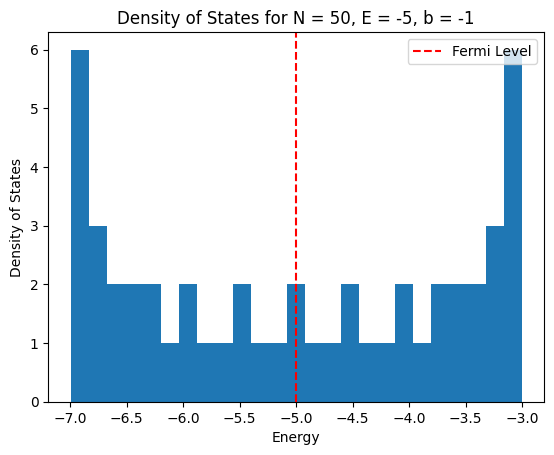

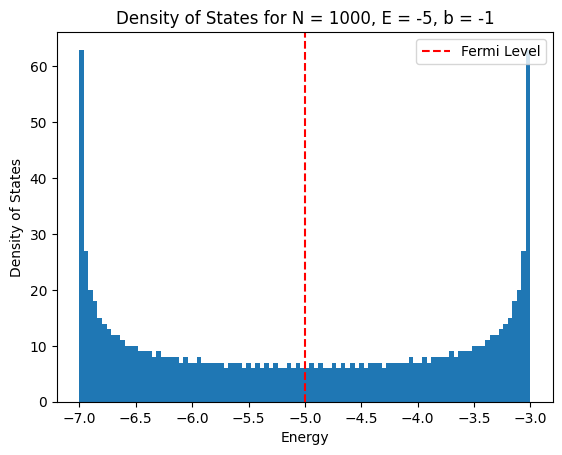

In [4]:
Plot_DOS(50, -5, -1, 25)
Plot_DOS(1000, -5, -1, 100)


# Eigenstates Plots

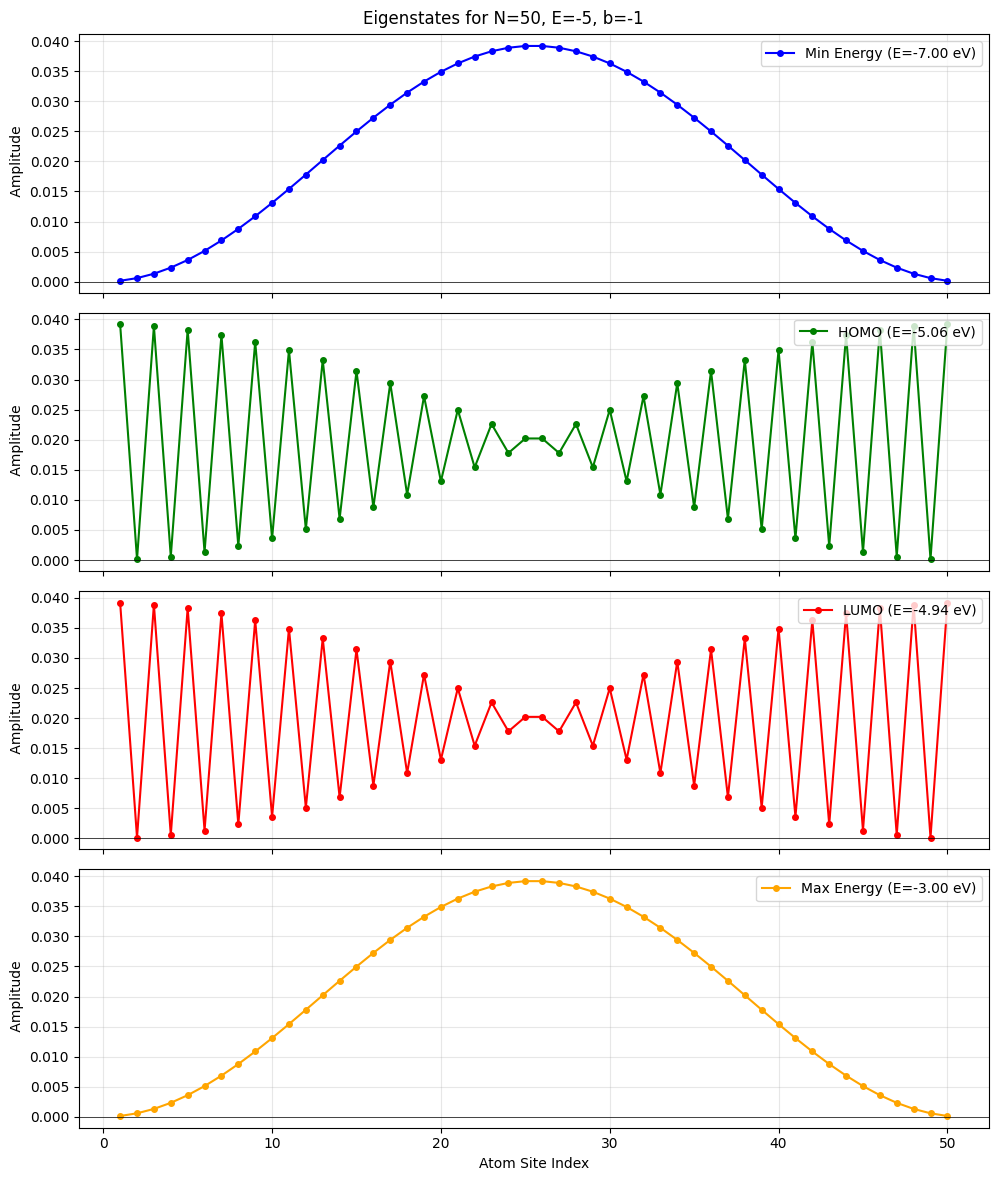

In [21]:
def Plot_eigenstates(N, E, b, PBC=False):
    H = Hamiltonian(N, E, b, PBC)
    eigenvals, eigenvecs = np.linalg.eigh(H)

    indices = [0, N//2-1, N//2, N-1]
    labels = ['Min Energy', 'HOMO', 'LUMO', 'Max Energy']
    colors = ['blue', 'green', 'red', 'orange']

    # 4. Plotting
    fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)
    sites = np.arange(1, N + 1)

    for i, idx in enumerate(indices):
        psi = eigenvecs[idx]**2

        axes[i].plot(sites, psi, 'o-', markersize=4, color=colors[i], label=f'{labels[i]} (E={eigenvals[idx]:.2f} eV)')
        axes[i].axhline(0, color='black', linewidth=0.5)
        axes[i].set_ylabel(' Amplitude')
        axes[i].legend(loc='upper right')
        axes[i].grid(True, alpha=0.3)

    axes[-1].set_xlabel('Atom Site Index')
    plt.suptitle(f'Eigenstates for N={N}, E={E}, b={b}')

    plt.tight_layout()
    plt.show()

Plot_eigenstates(50, -5, -1)

# PBC

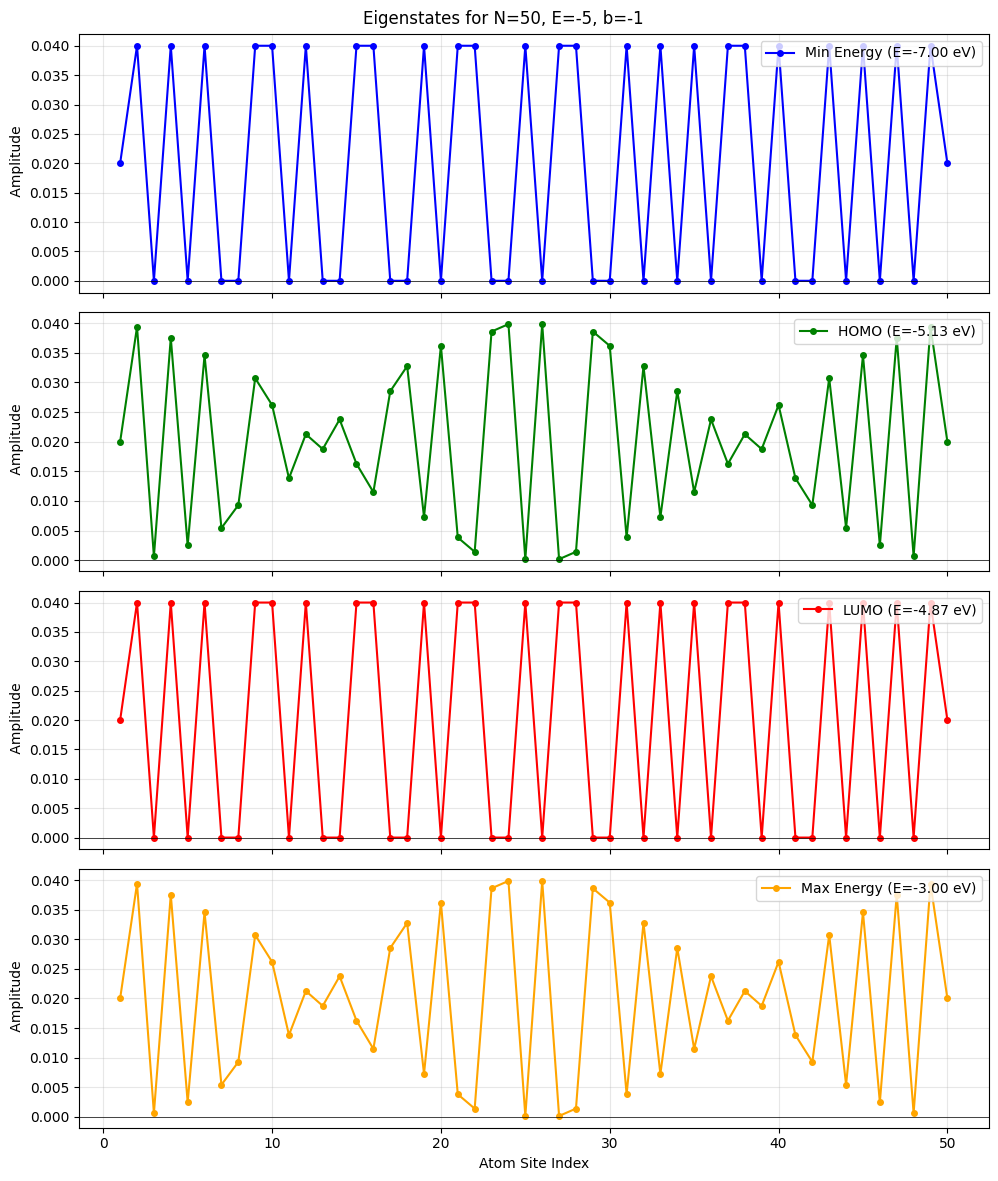

In [22]:
Plot_eigenstates(50, -5, -1, True)


In [16]:
H = Hamiltonian(4, -5, -1)
eigenvals, eigenvecs = np.linalg.eigh(H)
eigenvecs

array([[-0.37174803,  0.60150096,  0.60150096,  0.37174803],
       [-0.60150096,  0.37174803, -0.37174803, -0.60150096],
       [-0.60150096, -0.37174803, -0.37174803,  0.60150096],
       [-0.37174803, -0.60150096,  0.60150096, -0.37174803]])

In [18]:
eigenvecs[0]

array([-0.37174803,  0.60150096,  0.60150096,  0.37174803])